In [1]:

%matplotlib inline
import pandas as pd
import itertools

from matplotlib import pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import sys
import os
import shutil

datatypelist=[]

f1="/Users/irffanalahi/Research/Research_update/Dataqc/allqc_together/WB_PBMC/Wetlab/pevPBMCLabQC-080221.txt"
df1=pd.read_csv(f1,sep="\t")
tmpdata='CRC PBMC (n=' + str(len(df1)) + ')'
df1['data']=tmpdata
datatypelist.append(tmpdata)

f2="/Users/irffanalahi/Research/Research_update/Dataqc/allqc_together/WB_PBMC/Wetlab/melPBMCLabQC-080221.txt"
df2=pd.read_csv(f2,sep="\t")
tmpdata='SKCM PBMC (n=' + str(len(df2)) + ')'
df2['data']=tmpdata
datatypelist.append(tmpdata)

f3="/Users/irffanalahi/Research/Research_update/Dataqc/allqc_together/WB_PBMC/Wetlab/Healthy_cfDNA_and_WB_QC_ 072721_WBonly.txt"
df3=pd.read_csv(f3,sep="\t")
tmpdata='Healthy WB (n=' + str(len(df3)) + ')'
df3['data']=tmpdata
datatypelist.append(tmpdata)



outputfile=f3
outputfolder=os.path.dirname(outputfile)

dflist=[df1,df2,df3] ###########


######duplication_rate####
#valuevars=['d50th_ptle','50th_ptle','total','secondary','supplementary','duplicates','mapped','mapped_percent','paired_in_sequencing','read1','read2','properly_paired','properly_paired_percentage','with_itself_and_mate_mapped','singletons','with_mate_mapped_to_a_different_chr','with_mate_mapped_to_a_different_chr_mapQ>=5','duplication_rate']

#valuevars=['rc1','rc1_stdev','rc2','rc2_stdev','rc3','rc3_stdev','1 - rc1','1-rc1_stdev','1 - rc2','1-rc2_stdev','1 - rc3','1-rc3_stdev','1 - mean(rc)','1-mean(rc)_stdev','BCR']
valuevars=['Total DNA amount (ng)','gDNA used for Lib prep (ng)','Unmethylated Lambda DNA- 0.5% (ng)','gDNA (ng) for BS conversion','Indexing PCR cycles','Target sequencing Depth','Library Avg. Fragment size (Bioanalyzer)','Final Lib. Conc. (ng/ul)','Elution vol. (ul)','Total amount of Lib (ng)','dsDNA-MW (660) x Avg. Fragment size','nM of Library/ul']
#valuevars=['Plasma vol. (ml)','cfDNA amount (ng)','cfDNA amount (ng/ml)','Total cfDNA amt (ng) including previous extractions','Bioanalyzer 70bp-450bp percentage']#	'Indexing PCR cycles'	Final Lib. Conc. (ng/ul)	Elution vol. (ul)	Total amount of Lib (ng)

print(outputfolder)
len(valuevars)

/Users/irffanalahi/Research/Research_update/Dataqc/allqc_together/WB_PBMC/Wetlab


12

In [2]:
alldf = pd.concat(dflist)
#alldf.to_csv(outputfolder + '/test.csv')

In [3]:
cols = []
values = []

for col in alldf.columns:
    split = col.split('_')
    joined = '-'.join(split)
    cols.append(joined)
    
for col in valuevars:
    split = col.split('_')
    joined = '-'.join(split)
    values.append(joined)

alldf.columns = cols
valuevars = values

alldf

,Source,TUMOR/Whole blood/PBMC,Sample ID,Sample type,Pateint vs. Healthy,Cancer Type,Category,Total DNA amount (ng),gDNA used for Lib prep (ng),Unmethylated Lambda DNA- 0.5% (ng),...,Elution vol. (ul),Total amount of Lib (ng),dsDNA-MW (660) x Avg. Fragment size,nM of Library/ul,% NA,Median depth,Median fragment length,data,TUMOR/Whole blood,gDNA amt after Covaris shearing (ng)
0,WashU,PBMC,1313-PBMC,Bulk,Patient,CRC,gDNA,2400.0,25,0.13,...,20,86.27,214500,20.11,NaN,NaN,NaN,CRC PBMC (n=3),NaN,NaN
1,WashU,PBMC,1382-PBMC,Bulk,Patient,CRC,gDNA,500.0,25,0.13,...,20,208.00,214500,48.48,NaN,NaN,NaN,CRC PBMC (n=3),NaN,NaN
2,WashU,PBMC,1389-PBMC,Bulk,Patient,CRC,gDNA,1075.0,25,0.13,...,20,556.00,214500,129.60,NaN,NaN,NaN,CRC PBMC (n=3),NaN,NaN
0,WashU,PBMC,123-PBMC,Bulk,Patient,Melanoma,gDNA,7634.0,100,0.50,...,25,140.00,231000,24.24,NaN,NaN,NaN,SKCM PBMC (n=2),NaN,NaN
1,WashU,PBMC,159-PBMC,Bulk,Patient,Melanoma,gDNA,6688.0,100,0.50,...,25,62.50,231000,10.82,NaN,NaN,NaN,SKCM PBMC (n=2),NaN,NaN
0,WashU,NaN,NU-05-Bulk-WB,Bulk,Healthy,NaN,gDNA,12290.0,100,0.50,...,30,129.40,231000,18.67,NaN,NaN,NaN,Healthy WB (n=12),Whole blood,814.73
1,WashU,NaN,NU-14-Bulk-WB,Bulk,Healthy,NaN,gDNA,17250.0,100,0.50,...,30,87.00,231000,12.55,NaN,NaN,NaN,Healthy WB (n=12),Whole blood,1419.00
2,WashU,NaN,NU-31-Bulk-WB,Bulk,Healthy,NaN,gDNA,15200.0,100,0.50,...,30,71.40,231000,10.30,NaN,NaN,NaN,Healthy WB (n=12),Whole blood,1100.00
3,WashU,NaN,NU-24-Bulk-WB,Bulk,Healthy,NaN,gDNA,27650.0,100,0.50,...,30,72.60,231000,10.48,NaN,NaN,NaN,Healthy WB (n=12),Whole blood,946.00
4,WashU,NaN,NU-35-Bulk-WB,Bulk,Healthy,NaN,gDNA,24450.0,100,0.50,...,30,80.20,231000,11.57,NaN,NaN,NaN,Healthy WB (n=12),Whole blood,1331.00


In [4]:
mdf = pd.melt(alldf, id_vars=['data'], value_vars=valuevars)

In [5]:
def combine_box_pairs(samples, cell_types):
    box_pairs = []
    for cell in cell_types:
        pairs = []
        for sample in samples:
            pairs.append((cell, sample))
        for i in range(len(samples)):
            try:
                box_pairs.append((pairs[i], pairs[i + 1]))
            except IndexError:
                box_pairs.append((pairs[i], pairs[0]))
    return box_pairs

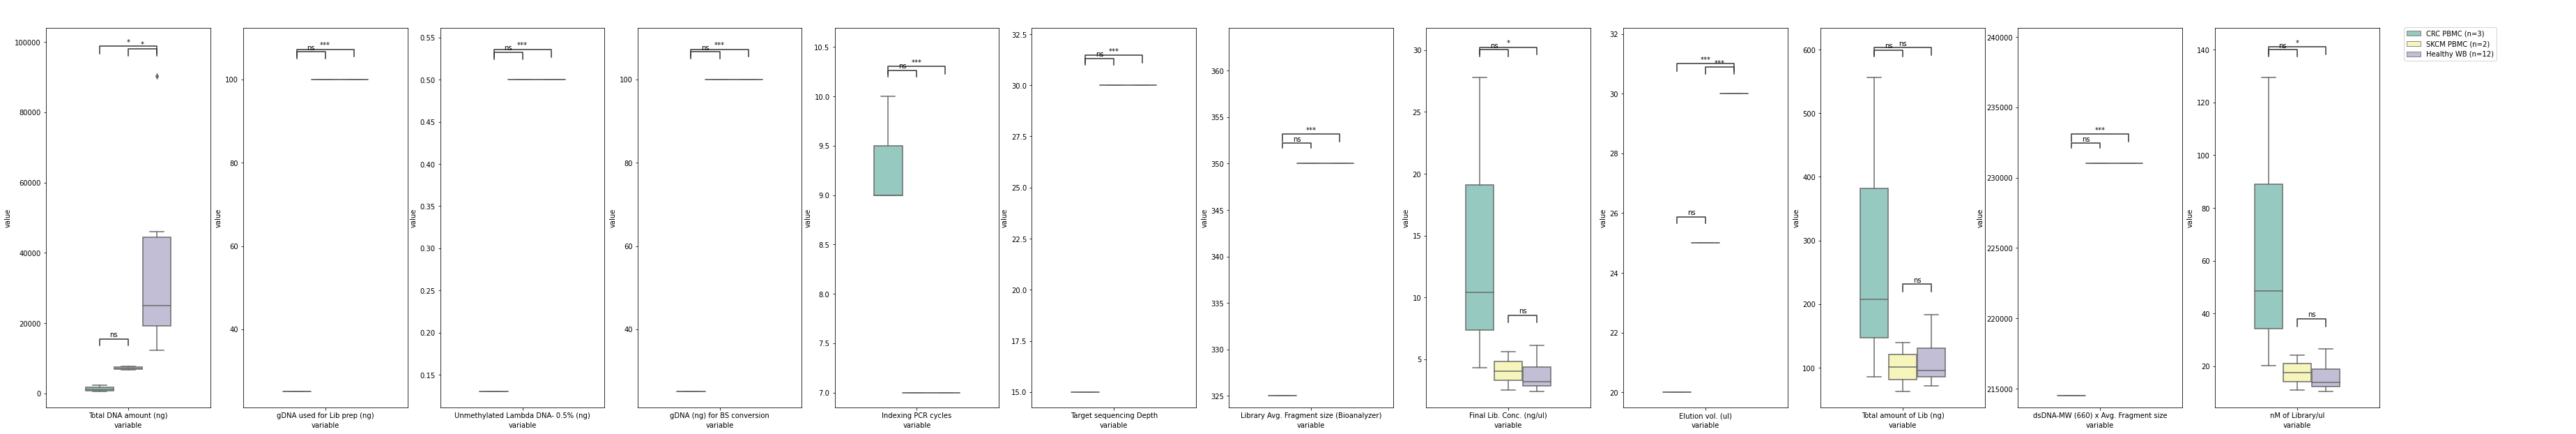

In [6]:
fig, axs = plt.subplots(1, len(valuevars), figsize=(len(valuevars)*5, 10))

p_vals_fol = outputfolder + '/p_vals'
os.mkdir(p_vals_fol)

for i in range(len(valuevars)):
    axs[i] = sns.boxplot(x="variable", y="value", hue="data", data=mdf[mdf['variable'] == valuevars[i]],palette="Set3", ax = axs[i])
    axs[i].legend([],[], frameon=False)
    Box_pairs=combine_box_pairs(datatypelist, [valuevars[i]])
    
    for j in range(len(Box_pairs)):
        original_stdout = sys.stdout

        with open(p_vals_fol + '/p_vals' + str(i) + str(j) + '.txt', 'w') as f:
            sys.stdout = f # Change the standard output to the file we created.
            try: 
                test_results = add_stat_annotation(axs[i],data=mdf[mdf['variable'] == valuevars[i]], x="variable", y="value", hue="data",box_pairs=[Box_pairs[j]],
                                                   test='Mann-Whitney', text_format='star', comparisons_correction=None)
            except ValueError:
                pass
            sys.stdout = original_stdout # Reset the standard output to its original value

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc=(0.933, 0.86))
plt.show()

fig.savefig(outputfile+"_all_separate.pdf",dpi=300, bbox_inches='tight')
#plt.savefig('separate_example_non-hue_outside_all.png', dpi=300, bbox_inches='tight')

In [7]:
sig_comparison = []

for i in range(len(valuevars)):
    sig_list = []
    for j in range(len(combine_box_pairs(datatypelist, [valuevars[i]]))):
        file_out = open(p_vals_fol + '/p_vals' + str(i) + str(j) + '.txt', 'r')
        Lines = file_out.readlines()
        file_out.close()

        for line in Lines:
            if 'P_val' in line:
                split = line.split(' ')
                for name in split:
                    if 'P_val' in name:
                        res = name.split('=')
                        if float(res[1]) < 0.05:
                            new_line = line.split('_')
                            cell = new_line[0]
                            val1 = new_line[1].split(' v.s.')[0]
                            val2 = new_line[2].split(':')[0]
                            sig_list.append(((cell, val1), (cell, val2)))
    print(sig_list)
    sig_comparison.append(sig_list)

sig_comparison

[(('Total DNA amount (ng)', 'SKCM PBMC (n=2)'), ('Total DNA amount (ng)', 'Healthy WB (n=12)')), (('Total DNA amount (ng)', 'CRC PBMC (n=3)'), ('Total DNA amount (ng)', 'Healthy WB (n=12)'))]
[(('gDNA used for Lib prep (ng)', 'CRC PBMC (n=3)'), ('gDNA used for Lib prep (ng)', 'Healthy WB (n=12)'))]
[(('Unmethylated Lambda DNA- 0.5% (ng)', 'CRC PBMC (n=3)'), ('Unmethylated Lambda DNA- 0.5% (ng)', 'Healthy WB (n=12)'))]
[(('gDNA (ng) for BS conversion', 'CRC PBMC (n=3)'), ('gDNA (ng) for BS conversion', 'Healthy WB (n=12)'))]
[(('Indexing PCR cycles', 'CRC PBMC (n=3)'), ('Indexing PCR cycles', 'Healthy WB (n=12)'))]
[(('Target sequencing Depth', 'CRC PBMC (n=3)'), ('Target sequencing Depth', 'Healthy WB (n=12)'))]
[(('Library Avg. Fragment size (Bioanalyzer)', 'CRC PBMC (n=3)'), ('Library Avg. Fragment size (Bioanalyzer)', 'Healthy WB (n=12)'))]
[(('Final Lib. Conc. (ng/ul)', 'CRC PBMC (n=3)'), ('Final Lib. Conc. (ng/ul)', 'Healthy WB (n=12)'))]
[(('Elution vol. (ul)', 'SKCM PBMC (n=2)')

[[(('Total DNA amount (ng)', 'SKCM PBMC (n=2)'),
   ('Total DNA amount (ng)', 'Healthy WB (n=12)')),
  (('Total DNA amount (ng)', 'CRC PBMC (n=3)'),
   ('Total DNA amount (ng)', 'Healthy WB (n=12)'))],
 [(('gDNA used for Lib prep (ng)', 'CRC PBMC (n=3)'),
   ('gDNA used for Lib prep (ng)', 'Healthy WB (n=12)'))],
 [(('Unmethylated Lambda DNA- 0.5% (ng)', 'CRC PBMC (n=3)'),
   ('Unmethylated Lambda DNA- 0.5% (ng)', 'Healthy WB (n=12)'))],
 [(('gDNA (ng) for BS conversion', 'CRC PBMC (n=3)'),
   ('gDNA (ng) for BS conversion', 'Healthy WB (n=12)'))],
 [(('Indexing PCR cycles', 'CRC PBMC (n=3)'),
   ('Indexing PCR cycles', 'Healthy WB (n=12)'))],
 [(('Target sequencing Depth', 'CRC PBMC (n=3)'),
   ('Target sequencing Depth', 'Healthy WB (n=12)'))],
 [(('Library Avg. Fragment size (Bioanalyzer)', 'CRC PBMC (n=3)'),
   ('Library Avg. Fragment size (Bioanalyzer)', 'Healthy WB (n=12)'))],
 [(('Final Lib. Conc. (ng/ul)', 'CRC PBMC (n=3)'),
   ('Final Lib. Conc. (ng/ul)', 'Healthy WB (n=12)'))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Total DNA amount (ng)_SKCM PBMC (n=2) v.s. Total DNA amount (ng)_Healthy WB (n=12): Mann-Whitney-Wilcoxon test two-sided, P_val=3.576e-02 U_stat=0.000e+00
Total DNA amount (ng)_CRC PBMC (n=3) v.s. Total DNA amount (ng)_Healthy WB (n=12): Mann-Whitney-Wilcoxon test two-sided, P_val=1.154e-02 U_stat=0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

gDNA used for Lib prep (ng)_CRC PBMC (n=3) v.s. gDNA used for Lib prep (ng)_Healthy WB (n=12): Mann-Whitney-Wilcoxon test two-sided, P_val=2.751e-04 U_stat=0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Unmethylated Lambda DNA- 0.5% (ng

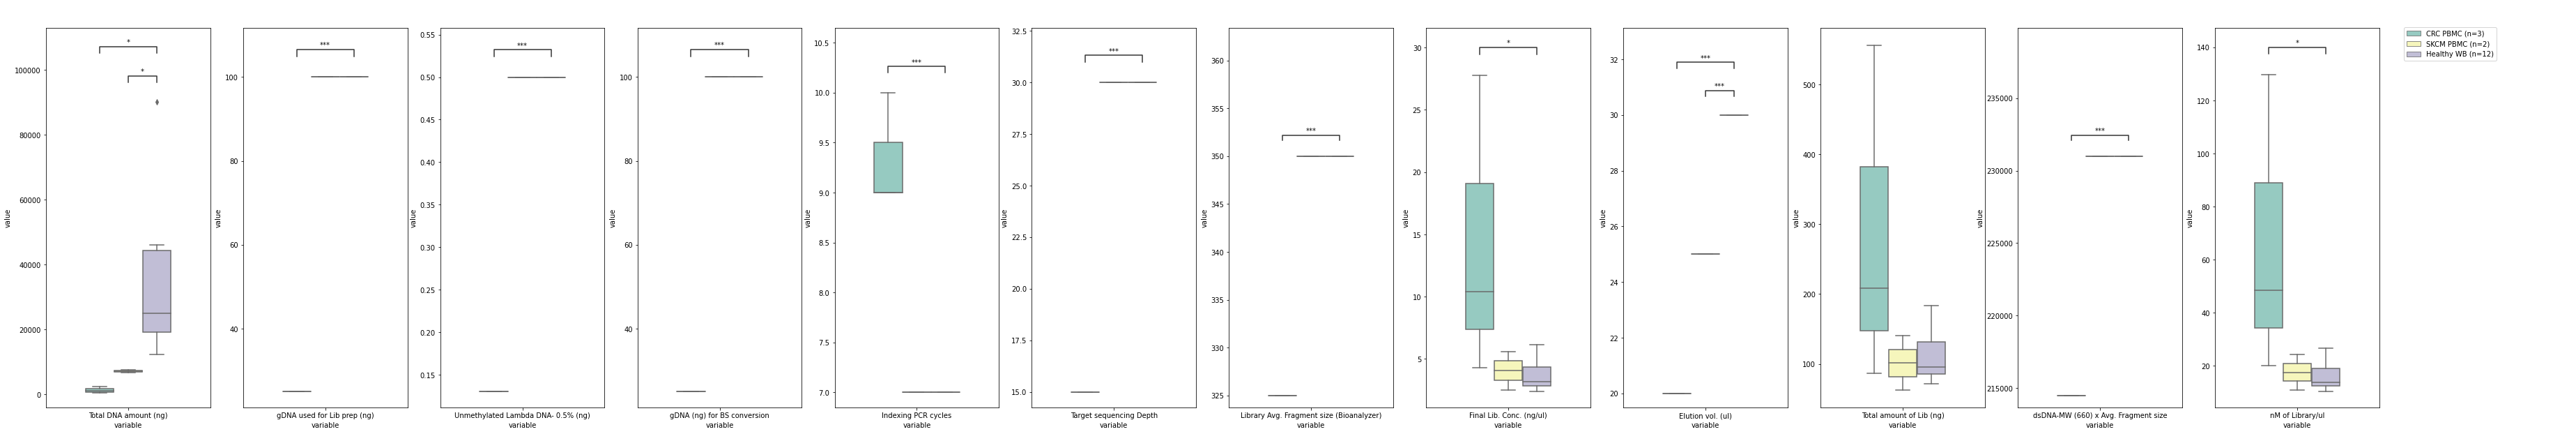

In [8]:
fig, axs = plt.subplots(1, len(valuevars), figsize=(len(valuevars)*5, 10))

for i in range(len(valuevars)):
    axs[i] = sns.boxplot(x="variable", y="value", hue="data", data=mdf[mdf['variable'] == valuevars[i]],palette="Set3", ax = axs[i])
    axs[i].legend([],[], frameon=False)
    Box_pairs=sig_comparison[i]
    if len(Box_pairs) != 0:
        test_results = add_stat_annotation(axs[i],data=mdf[mdf['variable'] == valuevars[i]], x="variable", y="value", hue="data",box_pairs=Box_pairs,
                                    test='Mann-Whitney', text_format='star', comparisons_correction=None)

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc=(0.933, 0.86))
plt.show()

fig.savefig(outputfile+"_significant_separate.pdf",dpi=300, bbox_inches='tight')
#plt.savefig('separate_example_non-hue_outside_significant.png', dpi=300, bbox_inches='tight')

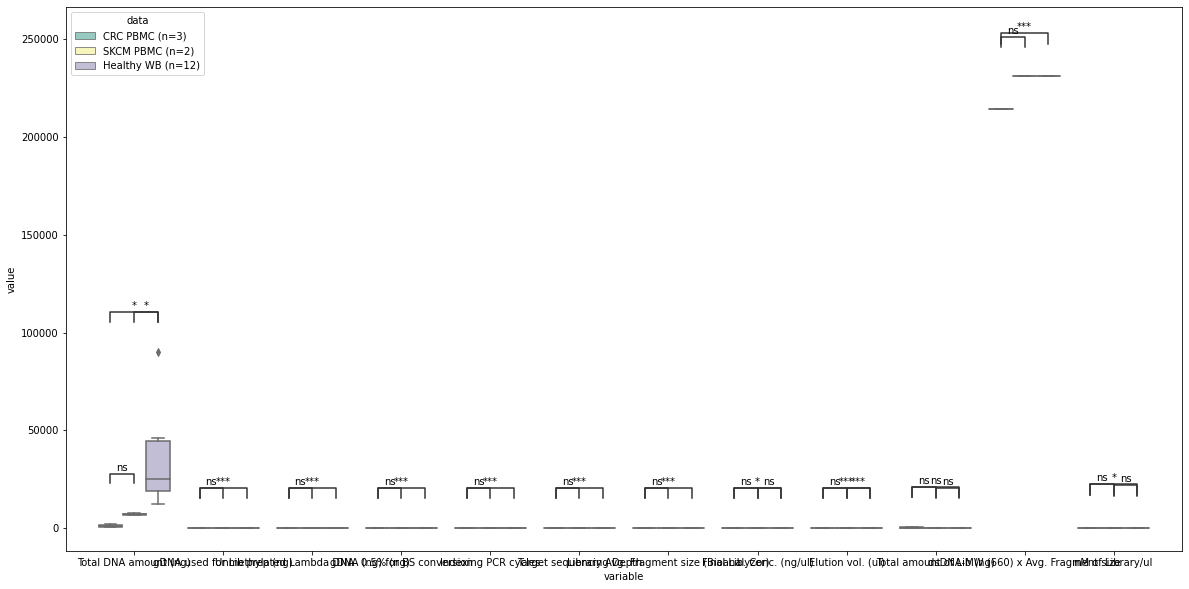

In [9]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", hue="data", data=mdf,palette="Set3") 

Box_pairs = combine_box_pairs(datatypelist, valuevars)

combined_fol = outputfolder + '/p_vals_combined'
os.mkdir(combined_fol)

for j in range(len(Box_pairs)):
    original_stdout = sys.stdout

    with open(combined_fol + '/p_vals' + str(j) + '.txt', 'w') as f:
        sys.stdout = f # Change the standard output to the file we created.
        try: 
            test_results = add_stat_annotation(ax,data=mdf, x="variable", y="value", hue="data",box_pairs=[Box_pairs[j]],
                                               test='Mann-Whitney', text_format='star', comparisons_correction=None)
        except ValueError:
            pass
        sys.stdout = original_stdout # Reset the standard output to its original value

plt.show()

ax.figure.savefig(outputfile+"_all_combined.pdf",dpi=300, bbox_inches='tight')
#plt.savefig('example_non-hue_outside_all.png', dpi=300, bbox_inches='tight')

In [10]:
sig_list = []

for j in range(len(Box_pairs)):
    file_out = open(combined_fol + '/p_vals' + str(j) + '.txt', 'r')
    Lines = file_out.readlines()
    file_out.close()

    for line in Lines:
        if 'P_val' in line:
            split = line.split(' ')
            for name in split:
                if 'P_val' in name:
                    res = name.split('=')
                    if float(res[1]) < 0.05:
                        new_line = line.split('_')
                        cell = new_line[0]
                        val1 = new_line[1].split(' v.s.')[0]
                        val2 = new_line[2].split(':')[0]
                        sig_list.append(((cell, val1), (cell, val2)))

sig_list

[(('Total DNA amount (ng)', 'SKCM PBMC (n=2)'),
  ('Total DNA amount (ng)', 'Healthy WB (n=12)')),
 (('Total DNA amount (ng)', 'CRC PBMC (n=3)'),
  ('Total DNA amount (ng)', 'Healthy WB (n=12)')),
 (('gDNA used for Lib prep (ng)', 'CRC PBMC (n=3)'),
  ('gDNA used for Lib prep (ng)', 'Healthy WB (n=12)')),
 (('Unmethylated Lambda DNA- 0.5% (ng)', 'CRC PBMC (n=3)'),
  ('Unmethylated Lambda DNA- 0.5% (ng)', 'Healthy WB (n=12)')),
 (('gDNA (ng) for BS conversion', 'CRC PBMC (n=3)'),
  ('gDNA (ng) for BS conversion', 'Healthy WB (n=12)')),
 (('Indexing PCR cycles', 'CRC PBMC (n=3)'),
  ('Indexing PCR cycles', 'Healthy WB (n=12)')),
 (('Target sequencing Depth', 'CRC PBMC (n=3)'),
  ('Target sequencing Depth', 'Healthy WB (n=12)')),
 (('Library Avg. Fragment size (Bioanalyzer)', 'CRC PBMC (n=3)'),
  ('Library Avg. Fragment size (Bioanalyzer)', 'Healthy WB (n=12)')),
 (('Final Lib. Conc. (ng/ul)', 'CRC PBMC (n=3)'),
  ('Final Lib. Conc. (ng/ul)', 'Healthy WB (n=12)')),
 (('Elution vol. (ul)',

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Total DNA amount (ng)_SKCM PBMC (n=2) v.s. Total DNA amount (ng)_Healthy WB (n=12): Mann-Whitney-Wilcoxon test two-sided, P_val=3.576e-02 U_stat=0.000e+00
Elution vol. (ul)_SKCM PBMC (n=2) v.s. Elution vol. (ul)_Healthy WB (n=12): Mann-Whitney-Wilcoxon test two-sided, P_val=5.496e-04 U_stat=0.000e+00
Unmethylated Lambda DNA- 0.5% (ng)_CRC PBMC (n=3) v.s. Unmethylated Lambda DNA- 0.5% (ng)_Healthy WB (n=12): Mann-Whitney-Wilcoxon test two-sided, P_val=2.751e-04 U_stat=0.000e+00
gDNA (ng) for BS conversion_CRC PBMC (n=3) v.s. gDNA (ng) for BS conversion_Healthy WB (n=12): Mann-Whitney-Wilcoxon test two-sided, P_val=2.751e-04 U_stat=0.000e+00
Indexing PCR cycles_CRC PBMC (n=3) v.s. Indexing PCR cycles_Healthy WB (n=12): Mann-Whitney-Wilcoxon test two-sided, P_val=2.973e-04 U_stat=3.600e+01
Target sequencing Depth_CRC PBMC (n=3)

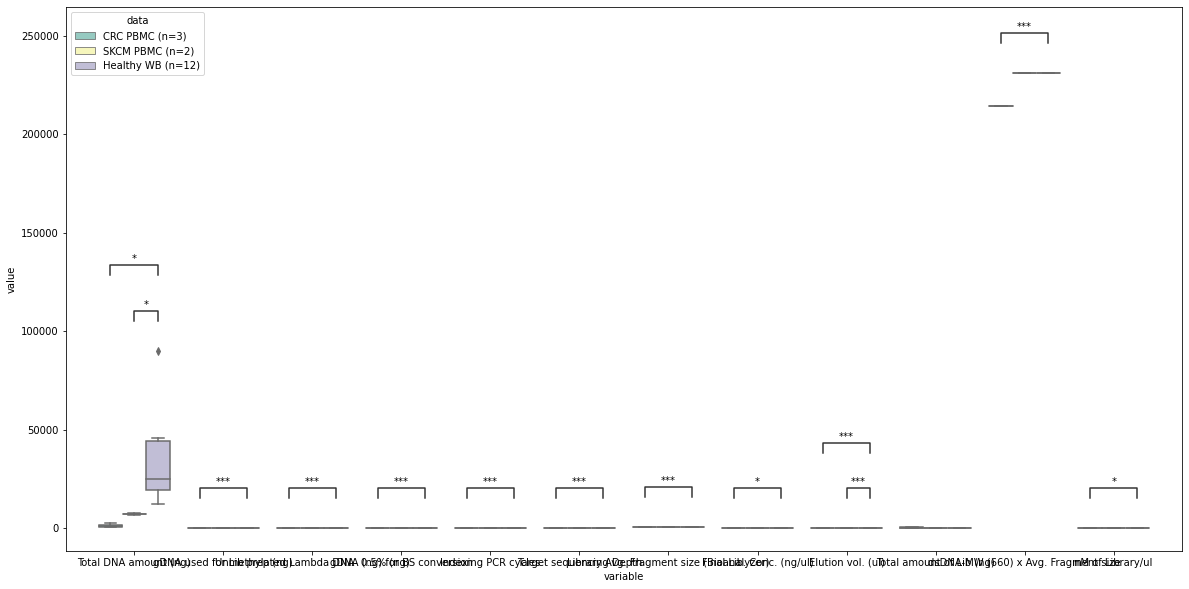

In [11]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", hue="data", data=mdf,palette="Set3") 

# Box_pairs=[(("cB","New healthy"),("cB","CRC"))]

test_results = add_stat_annotation(ax,data=mdf, x="variable", y="value", hue="data",box_pairs=sig_list,
                                   test='Mann-Whitney', text_format='star', comparisons_correction=None)

plt.show()

ax.figure.savefig(outputfile+"_significant_combined.pdf",dpi=300, bbox_inches='tight')
#plt.savefig('example_non-hue_outside_significant.png', dpi=300, bbox_inches='tight')

In [12]:
shutil.rmtree(p_vals_fol)
shutil.rmtree(combined_fol)